# Intermediate Importing Data in Python

## Course Description
As a data scientist, you will need to clean data, wrangle and munge it, visualize it, build predictive models and interpret these models. Before you can do so, however, you will need to know how to get data into Python. In the prequel to this course, you learned many ways to import data into Python: from flat files such as .txt and .csv; from files native to other software such as Excel spreadsheets, Stata, SAS, and MATLAB files; and from relational databases such as SQLite and PostgreSQL. **In this course, you'll extend this knowledge base by learning to import data from the web and by pulling data from Application Programming Interfaces— APIs—such as the Twitter streaming API, which allows us to stream real-time tweets.**

## Chp 02 Introduction to APIs and JSONs


In this chapter, you will gain a deeper understanding of how to import data from the web. You will learn the basics of extracting data from APIs, gain insight on the importance of APIs, and practice extracting data by diving into the **OMDB** and Library of **Congress APIs**.

## <mark>2-1 Introduction to APIs and JSONs</mark>


### JSON: JavaScript Object Notations

## Pop quiz: What exactly is a JSON?
Which of the following is **NOT** true of the JSON file format?

**Possible Answers**

- [ ] JSONs consist of key-value pairs.

- [ ] JSONs are human-readable.

- [ ] The JSON file format arose out of a growing need for real-time server-to-browser communication.

- [x] The function json.load() will load the JSON into Python as a list.

- [ ] The function json.load() will load the JSON into Python as a dictionary.


## Loading and exploring a JSON

Now that you know what a JSON is, you'll load one into your Python environment and explore it yourself. Here, you'll load the JSON `'a_movie.json'` into the variable `json_data`, which will be a dictionary. You'll then explore the JSON contents by printing the key-value pairs of json_data to the shell.

**Instructions**

- Load the JSON `'a_movie.json'` into the variable `json_data` within the context provided by the with statement. To do so, use the function `json.load()` within the context manager.
- Use a for loop to print all key-value pairs in the dictionary `json_data`. Recall that you can access a value in a dictionary using the syntax: `dictionary[key]`.

In [ ]:
import json

# Load JSON: json_data
with open("datasets/a_movie.json") as json_file:
    json_data = json.load(json_file)

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

## Pop quiz: Exploring your JSON
Load the JSON 'a_movie.json' into a variable, which will be a dictionary. Do so by copying, pasting and executing the following code in the IPython Shell:

```Python
import json
with open("a_movie.json") as json_file:
    json_data = json.load(json_file)```
Print the values corresponding to the keys `'Title'` and `'Year'` and answer the following question about the movie that the JSON describes:

Which of the following statements is true of the movie in question?

**Possible Answers**
- The title is 'Kung Fu Panda' and the year is 2010.
- The title is 'Kung Fu Panda' and the year is 2008.
- [x] The title is 'The Social Network' and the year is 2010.
- The title is 'The Social Network' and the year is 2008.

## <mark>2-2 APIs and interacting with the world wide web</mark>

http://www.omdbapi.com/


In [ ]:
import requests

url = 'http://www.omdbapi.com/?i=tt1285016&apikey=58962d90'

r = requests.get(url)
json_data = r.json()

for key, value in json_data.items():
    print(key + ':', value)

## Opening and reading flat files from the web
You have just imported a file from the web, saved it locally and loaded it into a DataFrame. If you just wanted to load a file from the web into a DataFrame without first saving it locally, you can do that easily using pandas. In particular, you can use the function `pd.read_csv()` with the URL as the first argument and the separator sep as the second argument.

The URL of the file, once again, is
> `'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'`

**Instructions**

- Assign the URL of the file to the variable `url`.
- Read file into a DataFrame df using `pd.read_csv()`, recalling that the separator in the file is `';'`.
- Print the head of the DataFrame `df2`.
- Execute the rest of the code to plot histogram of the first feature in the DataFrame `df2`.

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Read file into a DataFrame and print its head
df2 = pd.read_csv(url, sep=';')
print(df2.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

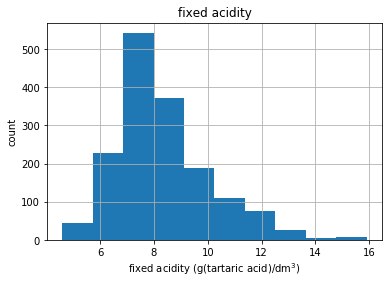

In [7]:
# Plot first column of df
pd.DataFrame.hist(df2.iloc[:, 0:1])
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()

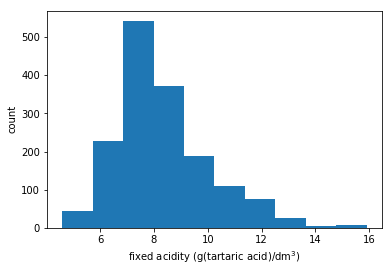

In [8]:
df2['fixed acidity'].plot(kind = 'hist')
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()

## Importing non-flat files from the web
Congrats! You've just loaded a flat file from the web into a DataFrame without first saving it locally using the pandas function `pd.read_csv()`. This function is super cool because it has close relatives that allow you to load all types of files, not only flat ones. In this interactive exercise, you'll use `pd.read_excel()` to import an Excel spreadsheet.

The URL of the spreadsheet is

> `'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'`

Your job is to use `pd.read_excel()` to read in all of its sheets, print the sheet names and then print the head of the first sheet using its name, not its index.

Note that the output of `pd.read_excel()` is a Python dictionary with sheet names as keys and corresponding DataFrames as corresponding values.

**Instructions**

- Assign the URL of the file to the variable `url2`.
- Read the file in url into a dictionary xls using `pd.read_excel()` recalling that, in order to import all sheets you need to pass `None` to the argument `sheet_name`.
- Print the names of the sheets in the Excel spreadsheet; these will be the `keys` of the dictionary `xls`.
- Print the head of the first sheet using the sheet name, not the index of the sheet! The sheet name is `'1700'`

In [11]:
?pd.read_excel

In [12]:
url2 = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'

# Read in all sheets of Excel file: xls
#sheet_name : string, int, mixed list of strings/ints, or None, default 0
#Specify None to get all sheets.

xls = pd.read_excel(url2, sheet_name = None)

# Print the sheetnames to the shell
print(xls.keys())

# Print the head of the first sheet (using its name, NOT its index)
print(xls['1700'].head())

odict_keys(['1700', '1900'])
                 country       1700
0            Afghanistan  34.565000
1  Akrotiri and Dhekelia  34.616667
2                Albania  41.312000
3                Algeria  36.720000
4         American Samoa -14.307000


In [13]:
type(xls)

collections.OrderedDict

In [15]:
type(xls['1700'])

pandas.core.frame.DataFrame

### URL: Uniform/Universal Resources Locator
### HTTP: HyperText Transfer Protocol
https://en.wikipedia.org/wiki/Hypertext_Transfer_Protocol

### HTML: HyperText Markup Language

In [17]:
from urllib.request import urlopen, Request

url = 'https://wikipedia.org/'

request = Request(url)

response = urlopen(request)

html = response.read()

response.close()

In [18]:
print(html)

b'<!DOCTYPE html>\n<html lang="mul" class="no-js">\n<head>\n<meta charset="utf-8">\n<title>Wikipedia</title>\n<meta name="description" content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation.">\n<![if gt IE 7]>\n<script>\ndocument.documentElement.className = document.documentElement.className.replace( /(^|\\s)no-js(\\s|$)/, "$1js-enabled$2" );\n</script>\n<![endif]>\n<!--[if lt IE 7]><meta http-equiv="imagetoolbar" content="no"><![endif]-->\n<meta name="viewport" content="initial-scale=1,user-scalable=yes">\n<link rel="apple-touch-icon" href="/static/apple-touch/wikipedia.png">\n<link rel="shortcut icon" href="/static/favicon/wikipedia.ico">\n<link rel="license" href="//creativecommons.org/licenses/by-sa/3.0/">\n<style>\n.sprite{background-image:url(portal/wikipedia.org/assets/img/sprite-9ba8de1b.png);background-image:linear-gradient(transparent,transparent),url(portal/wikipedia.org/assets/img/sprite-9ba

## Requests Library
https://requests.readthedocs.io/en/master/

In [19]:
import requests

url = 'https://wikipedia.org/'

r = requests.get(url)

text = r.text

print(text)


<!DOCTYPE html>
<html lang="mul" class="no-js">
<head>
<meta charset="utf-8">
<title>Wikipedia</title>
<meta name="description" content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation.">
<![if gt IE 7]>
<script>
document.documentElement.className = document.documentElement.className.replace( /(^|\s)no-js(\s|$)/, "$1js-enabled$2" );
</script>
<![endif]>
<!--[if lt IE 7]><meta http-equiv="imagetoolbar" content="no"><![endif]-->
<meta name="viewport" content="initial-scale=1,user-scalable=yes">
<link rel="apple-touch-icon" href="/static/apple-touch/wikipedia.png">
<link rel="shortcut icon" href="/static/favicon/wikipedia.ico">
<link rel="license" href="//creativecommons.org/licenses/by-sa/3.0/">
<style>
.sprite{background-image:url(portal/wikipedia.org/assets/img/sprite-9ba8de1b.png);background-image:linear-gradient(transparent,transparent),url(portal/wikipedia.org/assets/img/sprite-9ba8de1b.svg);background

## Performing HTTP requests in Python using urllib
Now that you know the basics behind HTTP GET requests, it's time to perform some of your own. In this interactive exercise, you will ping our very own DataCamp servers to perform a GET request to extract information from our teach page, "http://www.datacamp.com/teach/documentation".

In the next exercise, you'll extract the HTML itself. Right now, however, you are going to package and send the request and then catch the response.

**Instructions**

- Import the functions `urlopen` and `Request` from the subpackage `urllib.request`.
- Package the request to the url `"http://www.datacamp.com/teach/documentation"` using the function `Request()` and assign it to `request`.
- Send the request and catch the response in the variable `response` with the function `urlopen()`.
- Run the rest of the code to see the datatype of `response` and to `close` the connection!

## Printing HTTP request results in Python using urllib
You have just packaged and sent a GET request to `"http://www.datacamp.com/teach/documentation"` and then caught the response. You saw that such a response is a `http.client.HTTPResponse` object. The question remains: what can you do with this response?

Well, as it came from an HTML page, you could read it to extract the HTML and, in fact, such a `http.client.HTTPResponse` object has an associated `read()` method. In this exercise, you'll build on your previous great work to extract the response and print the HTML.

**Instructions**
- Send the request and catch the response in the variable response with the function `urlopen()`, as in the previous exercise.
- Extract the response using the `read()` method and store the result in the variable `html`.
- Print the string `html`.
- Hit submit to perform all of the above and to close the response: be tidy!

In [24]:
# Import packages
from urllib.request import urlopen, Request

# Specify the url
url = "http://www.datacamp.com/teach/documentation"

# This packages the request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Extract the response: html
html = response.read()

# Print the html
print(type(response))

# Be polite and close the response!
response.close()

<class 'http.client.HTTPResponse'>


In [25]:
print(html)

b'<!doctype html>\n<html lang="en" data-direction="ltr">\n  <head>\n    <link href="https://fonts.intercomcdn.com" rel="preconnect" crossorigin>\n      <script src="https://www.googletagmanager.com/gtag/js?id=UA-39297847-9" async="async" nonce="es9OGczSUd6Ph7DzktN8dHa5hYk8Rtzp3UUUHo2j94E="></script>\n      <script nonce="es9OGczSUd6Ph7DzktN8dHa5hYk8Rtzp3UUUHo2j94E=">\n        window.dataLayer = window.dataLayer || [];\n        function gtag(){dataLayer.push(arguments);}\n        gtag(\'js\', new Date());\n        gtag(\'config\', \'UA-39297847-9\');\n</script>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <title>DataCamp Help Center</title>\n    <meta name="description" content="">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n      <link rel="alternate" href="http://instructor-support.datacamp.com/en/" hreflang="en">\n\n      <meta name="intercom:trackingEvent" content="{&quot;name&quot;:&quot;Viewed Help Cen

## Performing HTTP requests in Python using <mark>requests</mark>
Now that you've got your head and hands around making HTTP requests using the urllib package, you're going to figure out how to do the same using the higher-level `requests` library. You'll once again be pinging DataCamp servers for their "http://www.datacamp.com/teach/documentation" page.

Note that unlike in the previous exercises using urllib, **you don't have to close the connection when using requests!**

**Instructions**

- Import the package `requests`.
- Assign the URL of interest to the variable `url`.
- Package the request to the URL, send the request and catch the response with a single function `requests.get()`, assigning the response to the variable `r`.
- Use the text attribute of the object `r` to return the HTML of the webpage as a `string`; store the result in a variable `text`.
- Hit submit to print the HTML of the webpage.


In [26]:
# Import package
import requests

# Specify the url: url
url = "http://www.datacamp.com/teach/documentation"

# Packages the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response: text
text = r.text

print(type(r))
      
print(type(text))

<class 'requests.models.Response'>
<class 'str'>


In [27]:
print(text)

<!doctype html>
<html lang="en" data-direction="ltr">
  <head>
    <link href="https://fonts.intercomcdn.com" rel="preconnect" crossorigin>
      <script src="https://www.googletagmanager.com/gtag/js?id=UA-39297847-9" async="async" nonce="T3CVrPJHf2bYUl9MQRNqciREXMqD+hbgCYMbWW7pRQo="></script>
      <script nonce="T3CVrPJHf2bYUl9MQRNqciREXMqD+hbgCYMbWW7pRQo=">
        window.dataLayer = window.dataLayer || [];
        function gtag(){dataLayer.push(arguments);}
        gtag('js', new Date());
        gtag('config', 'UA-39297847-9');
</script>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <title>DataCamp Help Center</title>
    <meta name="description" content="">
    <meta name="viewport" content="width=device-width, initial-scale=1">

      <link rel="alternate" href="http://instructor-support.datacamp.com/en/" hreflang="en">

      <meta name="intercom:trackingEvent" content="{&quot;name&quot;:&quot;Viewed Help Center&quot;,&quot;metadata&qu

## <mark> 1-3 Scraping the web in Python</mark>

## Beautiful Soup library
https://www.crummy.com/software/BeautifulSoup/bs4/doc/

soup.title
soup.get_text()
soup.prettify()
soup.find_all()

In [28]:
from bs4 import BeautifulSoup # bs4 Beautiful Soup 4.X

import requests

url = 'https://www.crummy.com/software/BeautifulSoup/'

r = requests.get(url)

html_doc = r.text

soup = BeautifulSoup(html_doc)

In [30]:
print(soup.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   Beautiful Soup: We called him Tortoise because he taught us.
  </title>
  <link href="mailto:leonardr@segfault.org" rev="made"/>
  <link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
  <meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>
  <meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>
  <meta content="Leonard Richardson" name="author"/>
 </head>
 <body alink="red" bgcolor="white" link="blue" text="black" vlink="660066">
  <style>
   #tidelift { }

#tidelift a {
 border: 1px solid #666666;
 margin-left: auto;
 padding: 10px;
 text-decoration: none;
}

#tidelift .cta {
 background: url("tidelift.svg") no-repeat;
 padding-left: 30px;
}
  </style>
  <img align="right" src="1

In [31]:
soup.title

<title>Beautiful Soup: We called him Tortoise because he taught us.</title>

In [33]:
soup.get_text()

'\n\n\nBeautiful Soup: We called him Tortoise because he taught us.\n\n\n\n\n\n\n\n\n#tidelift { }\n\n#tidelift a {\n border: 1px solid #666666;\n margin-left: auto;\n padding: 10px;\n text-decoration: none;\n}\n\n#tidelift .cta {\n background: url("tidelift.svg") no-repeat;\n padding-left: 30px;\n}\n\n\n[ Download | Documentation | Hall of Fame | For enterprise | Source | Changelog | Discussion group  | Zine ]\n\nBeautiful Soup\n\nYou didn\'t write that awful page. You\'re just trying to get some\ndata out of it. Beautiful Soup is here to help. Since 2004, it\'s been\nsaving programmers hours or days of work on quick-turnaround\nscreen scraping projects.\nBeautiful Soup is a Python library designed for quick turnaround\nprojects like screen-scraping. Three features make it powerful:\n\n\nBeautiful Soup provides a few simple methods and Pythonic idioms\nfor navigating, searching, and modifying a parse tree: a toolkit for\ndissecting a document and extracting what you need. It doesn\'t 

In [34]:
for link in soup.find_all('a'):
    print(link.get('href'))

#Download
bs4/doc/
#HallOfFame
enterprise.html
https://code.launchpad.net/beautifulsoup
https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG
https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup
zine/
bs4/download/
http://lxml.de/
http://code.google.com/p/html5lib/
bs4/doc/
https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise
https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup
https://bugs.launchpad.net/beautifulsoup/
https://tidelift.com/security
https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website
zine/
None
bs4/download/
http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html
download/3.x/BeautifulSoup-3.2.2.tar.gz
https://tidelift.com/subscription/pkg/pypi-beautifulsoup?utm_source=pypi-beautifulsoup&utm_medium=referral&utm_campaign=website
None
http://www.nytimes.co

## Parsing HTML with BeautifulSoup
In this interactive exercise, you'll learn how to use the BeautifulSoup package to parse, prettify and extract information from HTML. You'll scrape the data from the webpage of Guido van Rossum, Python's very own [**Benevolent Dictator for Life**](https://en.wikipedia.org/wiki/Benevolent_dictator_for_life). In the following exercises, you'll prettify the HTML and then extract the text and the hyperlinks.

The URL of interest is url = 'https://www.python.org/~guido/'.

**Instructions**

- Import the function BeautifulSoup from the package `bs4`.
- Assign the URL of interest to the variable `url`.
- Package the request to the URL, send the request and catch the response with a single function `requests.get()`, assigning the response to the variable `r`.
- Use the text attribute of the object r to return the HTML of the webpage as a string; store the result in a variable `html_doc`.
- Create a BeautifulSoup object soup from the resulting HTML using the function `BeautifulSoup()`.
- Use the method `prettify()` on soup and assign the result to `pretty_soup`.
- Hit submit to print to prettified HTML to your shell!

In [37]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Prettify the BeautifulSoup object: pretty_soup
pretty_soup = soup.prettify()

# Print the response
print(pretty_soup)

<html>
 <head>
  <title>
   Guido's Personal Home Page
  </title>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <h1>
   <a href="pics.html">
    <img border="0" src="images/IMG_2192.jpg"/>
   </a>
   Guido van Rossum - Personal Home Page
   <a href="pics.html">
    <img border="0" height="216" src="images/guido-headshot-2019.jpg" width="270"/>
   </a>
  </h1>
  <p>
   <a href="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm">
    <i>
     "Gawky and proud of it."
    </i>
   </a>
  </p>
  <h3>
   <a href="images/df20000406.jpg">
    Who I Am
   </a>
  </h3>
  <p>
   Read
my
   <a href="http://neopythonic.blogspot.com/2016/04/kings-day-speech.html">
    "King's
Day Speech"
   </a>
   for some inspiration.
  </p>
  <p>
   I am the author of the
   <a href="http://www.python.org">
    Python
   </a>
   programming language.  See also my
   <a href="Resume.html">
    resume
   </a>
   and my
   <a href="Publications.html">
    publicati

## Turning a webpage into data using BeautifulSoup: getting the text
As promised, in the following exercises, you'll learn the basics of extracting information from HTML soup. In this exercise, you'll figure out how to extract the text from the BDFL's webpage, along with printing the webpage's title.

**Instructions**

- In the sample code, the HTML response object `html_doc` has already been created: your first task is to Soupify it using the function `BeautifulSoup()` and to assign the resulting soup to the variable `soup`.
- Extract the title from the HTML soup soup using the attribute `title` and assign the result to `guido_title`.
- Print the title of Guido's webpage to the shell using the `print()` function.
- Extract the text from the HTML soup soup using the method `get_text()` and assign to `guido_text`.
- Hit submit to print the text from Guido's webpage to the shell.

In [39]:
# Get the title of Guido's webpage: guido_title
guido_title = soup.title

# Print the title of Guido's webpage to the shell
print(guido_title)

# Get Guido's text: guido_text
guido_text = soup.get_text()

# Print Guido's text to the shell
print(guido_text)

<title>Guido's Personal Home Page</title>


Guido's Personal Home Page




Guido van Rossum - Personal Home Page


"Gawky and proud of it."
Who I Am
Read
my "King's
Day Speech" for some inspiration.

I am the author of the Python
programming language.  See also my resume
and my publications list, a brief bio, assorted writings, presentations and interviews (all about Python), some
pictures of me,
my new blog, and
my old
blog on Artima.com.  I am
@gvanrossum on Twitter.

I am retired, working on personal projects (and maybe a book).
I have worked for Dropbox, Google, Elemental Security, Zope
Corporation, BeOpen.com, CNRI, CWI, and SARA.  (See
my resume.)  I created Python while at CWI.

How to Reach Me
You can send email for me to guido (at) python.org.
I read everything sent there, but I receive too much email to respond
to everything.

My Name
My name often poses difficulties for Americans.

Pronunciation: in Dutch, the "G" in Guido is a hard G,
pronounced roughly like the "ch" in Sco

## Turning a webpage into data using BeautifulSoup: getting the hyperlinks

In this exercise, you'll figure out how to extract the URLs of the hyperlinks from the BDFL's webpage. In the process, you'll become close friends with the soup method `find_all()`.

**Instructions**

- Use the method `find_all()` to find all hyperlinks in soup, remembering that hyperlinks are defined by the HTML tag `<a>` but passed to `find_all()` without angle brackets; store the result in the variable `a_`tags.
- The variable a_tags is a results set: your job now is to enumerate over it, using a for loop and to print the actual URLs of the hyperlinks; to do this, for every element link in a_tags, you want to print() `link.get('href')`.

In [42]:
# Find all 'a' tags (which define hyperlinks): a_tags
a_tags = soup.find_all('a')

# Print the URLs to the shell
# <a href="https://www.w3schools.com/html/">Visit our HTML tutorial</a>
for link in a_tags:
    print(link.get('href'))

pics.html
pics.html
http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm
images/df20000406.jpg
http://neopythonic.blogspot.com/2016/04/kings-day-speech.html
http://www.python.org
Resume.html
Publications.html
bio.html
http://legacy.python.org/doc/essays/
http://legacy.python.org/doc/essays/ppt/
interviews.html
pics.html
http://neopythonic.blogspot.com
http://www.artima.com/weblogs/index.jsp?blogger=12088
https://twitter.com/gvanrossum
Resume.html
guido.au
http://legacy.python.org/doc/essays/
images/license.jpg
http://www.cnpbagwell.com/audio-faq
http://sox.sourceforge.net/
images/internetdog.gif
